In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
import re
import string

In [2]:
# Load datasets
df_true = pd.read_csv("True.csv")
df_fake = pd.read_csv("Fake.csv")

In [3]:
df_fake.head()

,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"


In [4]:
df_true.head()

,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017"


In [5]:
# Inserting a column "class" as target feature
df_fake["class"] = 0
df_true["class"] = 1

In [6]:
df_fake.shape, df_true.shape

((23481, 5), (21417, 5))

In [7]:
# Removing last 10 rows for manual testing
df_fake_manual_testing = df_fake.tail(10)
for i in range(23480,23470,-1):
    df_fake.drop([i], axis = 0, inplace = True)
    
    
df_true_manual_testing = df_true.tail(10)
for i in range(21416,21406,-1):
    df_true.drop([i], axis = 0, inplace = True)

In [8]:
df_fake.shape, df_true.shape


((23471, 5), (21407, 5))

In [9]:
df_fake_manual_testing["class"] = 0
df_true_manual_testing["class"] = 1

C:\Users\bhagy\AppData\Local\Temp\ipykernel_14764\860779283.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_fake_manual_testing["class"] = 0
C:\Users\bhagy\AppData\Local\Temp\ipykernel_14764\860779283.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_true_manual_testing["class"] = 1


In [10]:
df_fake_manual_testing.head()

,title,text,subject,date,class
23471,Seven Iranians freed in the prisoner swap have...,"21st Century Wire says This week, the historic...",Middle-east,"January 20, 2016",0
23472,#Hashtag Hell & The Fake Left,By Dady Chery and Gilbert MercierAll writers ...,Middle-east,"January 19, 2016",0
23473,Astroturfing: Journalist Reveals Brainwashing ...,Vic Bishop Waking TimesOur reality is carefull...,Middle-east,"January 19, 2016",0
23474,The New American Century: An Era of Fraud,Paul Craig RobertsIn the last years of the 20t...,Middle-east,"January 19, 2016",0
23475,Hillary Clinton: ‘Israel First’ (and no peace ...,Robert Fantina CounterpunchAlthough the United...,Middle-east,"January 18, 2016",0


In [11]:
df_true_manual_testing.head()

,title,text,subject,date,class
21407,"Mata Pires, owner of embattled Brazil builder ...","SAO PAULO (Reuters) - Cesar Mata Pires, the ow...",worldnews,"August 22, 2017",1
21408,"U.S., North Korea clash at U.N. forum over nuc...",GENEVA (Reuters) - North Korea and the United ...,worldnews,"August 22, 2017",1
21409,"U.S., North Korea clash at U.N. arms forum on ...",GENEVA (Reuters) - North Korea and the United ...,worldnews,"August 22, 2017",1
21410,Headless torso could belong to submarine journ...,COPENHAGEN (Reuters) - Danish police said on T...,worldnews,"August 22, 2017",1
21411,North Korea shipments to Syria chemical arms a...,UNITED NATIONS (Reuters) - Two North Korean sh...,worldnews,"August 21, 2017",1


In [12]:
# concatinate the real and fake data, which will be used for manual testing
df_manual_testing = pd.concat([df_fake_manual_testing,df_true_manual_testing], axis = 0)
df_manual_testing.to_csv("manual_testing.csv")

In [13]:
# concatinate real anf fake data
df_merge = pd.concat([df_fake, df_true], axis =0 )
df_merge.to_csv("df_merge.csv")
df_merge.head(10)

,title,text,subject,date,class
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",0
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",0
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017",0
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017",0
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017",0
5,Racist Alabama Cops Brutalize Black Boy While...,The number of cases of cops brutalizing and ki...,News,"December 25, 2017",0
6,"Fresh Off The Golf Course, Trump Lashes Out A...",Donald Trump spent a good portion of his day a...,News,"December 23, 2017",0
7,Trump Said Some INSANELY Racist Stuff Inside ...,In the wake of yet another court decision that...,News,"December 23, 2017",0
8,Former CIA Director Slams Trump Over UN Bully...,Many people have raised the alarm regarding th...,News,"December 22, 2017",0
9,WATCH: Brand-New Pro-Trump Ad Features So Muc...,Just when you might have thought we d get a br...,News,"December 21, 2017",0


In [14]:
df_merge.columns

Index(['title', 'text', 'subject', 'date', 'class'], dtype='object')

In [15]:
# remove columns which are not required
df = df_merge.drop(["title", "subject","date"], axis = 1)


In [16]:
df.isnull().sum()

text     0
class    0
dtype: int64

In [17]:
# shuffle the data 
df = df.sample(frac = 1)


In [18]:
df.head()

,text,class
15936,BEIRUT (Reuters) - The head of Syria s main Ku...,1
10628,WE LOVE HIS STYLE! Secretary of State Rex Till...,0
5876,WASHINGTON (Reuters) - President Donald Trump’...,1
10770,"NEWBERRY, S.C. (Reuters) - Pope Francis forcef...",1
1303,(Reuters) - Democrats desperate to rebuild aft...,1


In [19]:
# remove duplicates if any 
df=df.drop_duplicates()

In [20]:
df.head()

,text,class
15936,BEIRUT (Reuters) - The head of Syria s main Ku...,1
10628,WE LOVE HIS STYLE! Secretary of State Rex Till...,0
5876,WASHINGTON (Reuters) - President Donald Trump’...,1
10770,"NEWBERRY, S.C. (Reuters) - Pope Francis forcef...",1
1303,(Reuters) - Democrats desperate to rebuild aft...,1


In [21]:
df.reset_index(inplace = True)
df.drop(["index"], axis = 1, inplace = True)

In [22]:
df.columns

Index(['text', 'class'], dtype='object')

In [23]:
df.head()

,text,class
0,BEIRUT (Reuters) - The head of Syria s main Ku...,1
1,WE LOVE HIS STYLE! Secretary of State Rex Till...,0
2,WASHINGTON (Reuters) - President Donald Trump’...,1
3,"NEWBERRY, S.C. (Reuters) - Pope Francis forcef...",1
4,(Reuters) - Democrats desperate to rebuild aft...,1


In [24]:
# creating a function to process texts
def wordopt(text):
    text = text.lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub("\\W"," ",text) 
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)    
    return text

In [25]:
df["text"] = df["text"].apply(wordopt)


In [26]:
# Defining dependent and independent variables
x = df["text"]
y = df["class"]

In [27]:

# Splitting Training and Testing
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25)

In [28]:
# convert text to vectors
from sklearn.feature_extraction.text import TfidfVectorizer

vectorization = TfidfVectorizer()
xv_train = vectorization.fit_transform(x_train)
xv_test = vectorization.transform(x_test)

## Implementation of Logistic Regression

In [29]:
from sklearn.linear_model import LogisticRegression

LR = LogisticRegression()
LR.fit(xv_train,y_train)

C:\Users\bhagy\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\bhagy\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):


LogisticRegression()

In [30]:
pred_lr=LR.predict(xv_test)


In [31]:
LR.score(xv_test, y_test)


C:\Users\bhagy\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\bhagy\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\Users\bhagy\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\bhagy\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_d

0.9824016563146998

In [32]:
print(classification_report(y_test, pred_lr))


              precision    recall  f1-score   support

           0       0.98      0.98      0.98      4326
           1       0.98      0.99      0.98      5334

    accuracy                           0.98      9660
   macro avg       0.98      0.98      0.98      9660
weighted avg       0.98      0.98      0.98      9660



C:\Users\bhagy\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\bhagy\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\Users\bhagy\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\bhagy\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_d

C:\Users\bhagy\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\bhagy\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\Users\bhagy\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\bhagy\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_d

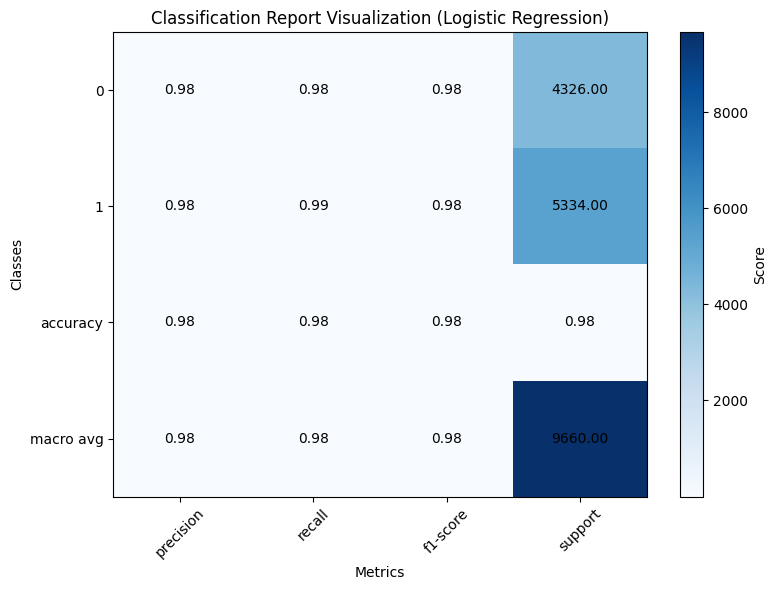

C:\Users\bhagy\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\bhagy\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\Users\bhagy\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\bhagy\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_d

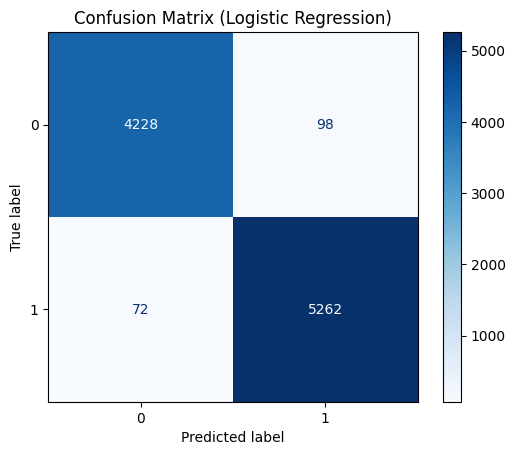

In [33]:
from sklearn.metrics import classification_report, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import pandas as pd

# Generate classification report as a dictionary
report = classification_report(y_test, pred_lr, output_dict=True)

# Convert report dictionary to a DataFrame for easier plotting
report_df = pd.DataFrame(report).transpose()

# Plot heatmap for classification report
plt.figure(figsize=(8, 6))
plt.imshow(report_df.iloc[:-1, :].values, cmap='Blues', aspect='auto')

# Adding text labels to the heatmap
for i in range(report_df.shape[0] - 1):  # Skip the last row (accuracy)
    for j in range(report_df.shape[1]):
        value = report_df.iloc[i, j]
        plt.text(j, i, f"{value:.2f}", ha='center', va='center', color='black')

# Formatting the plot
plt.xticks(range(len(report_df.columns)), report_df.columns, rotation=45, fontsize=10)
plt.yticks(range(len(report_df.index[:-1])), report_df.index[:-1], fontsize=10)
plt.colorbar(label="Score")
plt.title("Classification Report Visualization (Logistic Regression)")
plt.xlabel("Metrics")
plt.ylabel("Classes")
plt.tight_layout()
plt.show()

# Visualize confusion matrix
ConfusionMatrixDisplay.from_estimator(LR, xv_test, y_test, cmap='Blues')
plt.title("Confusion Matrix (Logistic Regression)")
plt.show()

## Implementation of algorithm of decision tree

In [34]:
# Decision Tree Classification
from sklearn.tree import DecisionTreeClassifier

DT = DecisionTreeClassifier()
DT.fit(xv_train, y_train)

C:\Users\bhagy\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\bhagy\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):


DecisionTreeClassifier()

In [35]:
pred_dt = DT.predict(xv_test)

In [36]:
DT.score(xv_test, y_test)


C:\Users\bhagy\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\bhagy\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\Users\bhagy\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\bhagy\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_d

0.9938923395445135

In [37]:
print(classification_report(y_test, pred_dt))


              precision    recall  f1-score   support

           0       0.99      0.99      0.99      4326
           1       0.99      0.99      0.99      5334

    accuracy                           0.99      9660
   macro avg       0.99      0.99      0.99      9660
weighted avg       0.99      0.99      0.99      9660



C:\Users\bhagy\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\bhagy\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\Users\bhagy\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\bhagy\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_d

C:\Users\bhagy\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\bhagy\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\Users\bhagy\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\bhagy\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_d

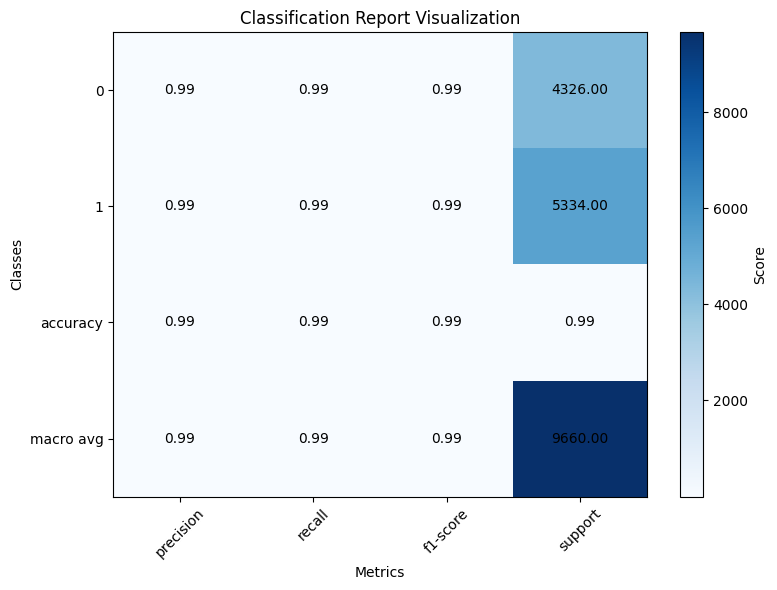

C:\Users\bhagy\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\bhagy\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\Users\bhagy\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\bhagy\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_d

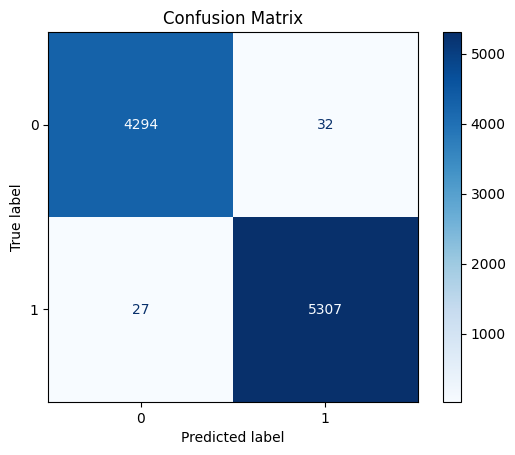

In [38]:
from sklearn.metrics import classification_report, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import numpy as np

# Generate classification report as a dictionary
report = classification_report(y_test, pred_dt, output_dict=True)

# Convert report dictionary to a DataFrame for easier plotting
import pandas as pd
report_df = pd.DataFrame(report).transpose()

# Plot heatmap for classification report
plt.figure(figsize=(8, 6))
plt.imshow(report_df.iloc[:-1, :].values, cmap='Blues', aspect='auto')

# Adding text labels
for i in range(report_df.shape[0] - 1):  # Skip the last row (accuracy)
    for j in range(report_df.shape[1]):
        value = report_df.iloc[i, j]
        plt.text(j, i, f"{value:.2f}", ha='center', va='center', color='black')

# Formatting the plot
plt.xticks(range(len(report_df.columns)), report_df.columns, rotation=45, fontsize=10)
plt.yticks(range(len(report_df.index[:-1])), report_df.index[:-1], fontsize=10)
plt.colorbar(label="Score")
plt.title("Classification Report Visualization")
plt.xlabel("Metrics")
plt.ylabel("Classes")
plt.tight_layout()
plt.show()

# Visualize confusion matrix
ConfusionMatrixDisplay.from_estimator(DT, xv_test, y_test, cmap='Blues')
plt.title("Confusion Matrix")
plt.show()


## implementation of Gradient Boosting Classifier


In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

GBC = GradientBoostingClassifier(random_state=0)
GBC.fit(xv_train, y_train)

C:\Users\bhagy\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\bhagy\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):


In [ ]:
GradientBoostingClassifier(random_state=0)

In [ ]:
pred_gbc = GBC.predict(xv_test)
GBC.score(xv_test, y_test)


In [ ]:
print(classification_report(y_test, pred_gbc))


In [ ]:
from sklearn.metrics import classification_report, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import pandas as pd

# Generate classification report as a dictionary
report = classification_report(y_test, pred_gbc, output_dict=True)

# Convert the report dictionary to a DataFrame for easier visualization
report_df = pd.DataFrame(report).transpose()

# Plot heatmap for classification report
plt.figure(figsize=(8, 6))
plt.imshow(report_df.iloc[:-1, :].values, cmap='Blues', aspect='auto')

# Adding text labels to the heatmap
for i in range(report_df.shape[0] - 1):  # Skip the last row (accuracy)
    for j in range(report_df.shape[1]):
        value = report_df.iloc[i, j]
        plt.text(j, i, f"{value:.2f}", ha='center', va='center', color='black')

# Formatting the plot
plt.xticks(range(len(report_df.columns)), report_df.columns, rotation=45, fontsize=10)
plt.yticks(range(len(report_df.index[:-1])), report_df.index[:-1], fontsize=10)
plt.colorbar(label="Score")
plt.title("Classification Report Visualization (Gradient Boosting Classifier)")
plt.xlabel("Metrics")
plt.ylabel("Classes")
plt.tight_layout()
plt.show()

# Visualize confusion matrix
ConfusionMatrixDisplay.from_estimator(GBC, xv_test, y_test, cmap='Blues')
plt.title("Confusion Matrix (Gradient Boosting Classifier)")
plt.show()


## Implementation of Random Forest Classifier algorithm 

In [ ]:
from sklearn.ensemble import RandomForestClassifier

RFC = RandomForestClassifier(random_state=0)
RFC.fit(xv_train, y_train)

In [ ]:
pred_rfc = RFC.predict(xv_test)
RFC.score(xv_test, y_test)

In [ ]:
print(classification_report(y_test, pred_rfc))

In [ ]:
from sklearn.metrics import classification_report, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import pandas as pd

# Generate classification report as a dictionary
report = classification_report(y_test, pred_rfc, output_dict=True)

# Convert report dictionary to a DataFrame for easier plotting
report_df = pd.DataFrame(report).transpose()

# Plot heatmap for classification report
plt.figure(figsize=(8, 6))
plt.imshow(report_df.iloc[:-1, :].values, cmap='Blues', aspect='auto')

# Adding text labels to heatmap
for i in range(report_df.shape[0] - 1):  # Skip the last row (accuracy)
    for j in range(report_df.shape[1]):
        value = report_df.iloc[i, j]
        plt.text(j, i, f"{value:.2f}", ha='center', va='center', color='black')

# Formatting the plot
plt.xticks(range(len(report_df.columns)), report_df.columns, rotation=45, fontsize=10)
plt.yticks(range(len(report_df.index[:-1])), report_df.index[:-1], fontsize=10)
plt.colorbar(label="Score")
plt.title("Classification Report Visualization (Random Forest)")
plt.xlabel("Metrics")
plt.ylabel("Classes")
plt.tight_layout()
plt.show()

# Visualize confusion matrix
ConfusionMatrixDisplay.from_estimator(RFC, xv_test, y_test, cmap='Blues')
plt.title("Confusion Matrix (Random Forest)")
plt.show()


## Model Testing

In [ ]:
def output_lable(n):
    if n == 0:
        return "Fake News"
    elif n == 1:
        return "Not A Fake News"
    
def manual_testing(news):
    testing_news = {"text":[news]}
    new_def_test = pd.DataFrame(testing_news)
    new_def_test["text"] = new_def_test["text"].apply(wordopt) 
    new_x_test = new_def_test["text"]
    new_xv_test = vectorization.transform(new_x_test)
    pred_LR = LR.predict(new_xv_test)
    pred_DT = DT.predict(new_xv_test)
    pred_GBC = GBC.predict(new_xv_test)
    pred_RFC = RFC.predict(new_xv_test)

    return print("\n\nLR Prediction: {} \nDT Prediction: {} \nGBC Prediction: {} \nRFC Prediction: {}".format(output_lable(pred_LR[0]),  output_lable(pred_DT[0]), output_lable(pred_GBC[0]), output_lable(pred_RFC[0])))

In [ ]:
news = str(input())
manual_testing(news)

In [ ]:
news = str(input())
manual_testing(news)